In [32]:
import json
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('logins.json')
df.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [28]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df_data = pd.DataFrame(data)
df_data.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [26]:
import datetime 
dfn1 =df.set_index(['login_time'])
dfn1['count'] = 1
df_15T = dfn1.resample('15T').count()
df_15T = df_15T.reset_index()
df_15T.head()

,login_time,count
0,1970-01-01 20:15:00,2
1,1970-01-01 20:30:00,6
2,1970-01-01 20:45:00,9
3,1970-01-01 21:00:00,7
4,1970-01-01 21:15:00,1


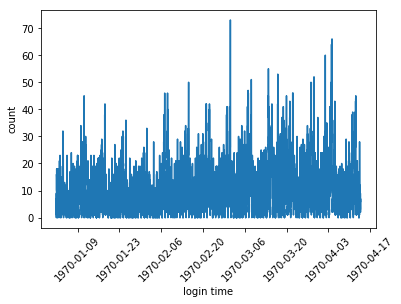

In [35]:

X= df_15T['login_time']
Y = df_15T['count']
plt.plot(X,Y)
plt.xlabel('login time')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()


The above plot shows login time counts for a period of 3.5 months.

In [41]:
#To better understand the trends lets see for monthly,weekly and hourly trends.

jan = df_15T[(df_15T['login_time']>'1970-01-01') & (df_15T['login_time']<'1970-02-01') ]
feb = df_15T[(df_15T['login_time']>'1970-02-01') & (df_15T['login_time']<'1970-03-01') ]
mar = df_15T[(df_15T['login_time']>'1970-03-01') & (df_15T['login_time']<'1970-04-01') ]
apr = df_15T[(df_15T['login_time']>'1970-04-01') & (df_15T['login_time']<'1970-05-01') ]

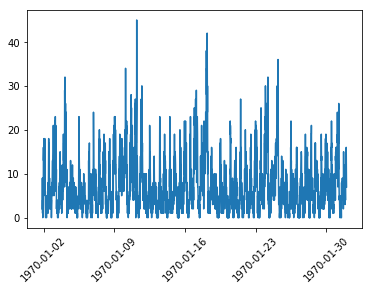

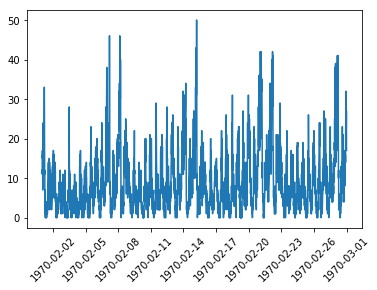

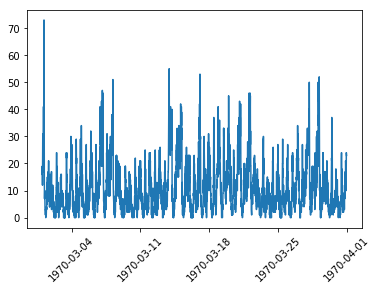

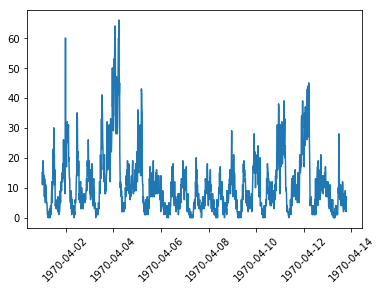

In [44]:
plt.plot(jan['login_time'],jan['count'])
plt.xticks(rotation=45)
plt.show()
plt.plot(feb['login_time'],feb['count'])
plt.xticks(rotation=45)
plt.show()
plt.plot(mar['login_time'],mar['count'])
plt.xticks(rotation=45)
plt.show()
plt.plot(apr['login_time'],apr['count'])
plt.xticks(rotation=45)
plt.show()

Monthly login data doesnt show any important trends.So we will check for weekly trends.

In [50]:
df_15T['weekday']= df_15T['login_time'].dt.dayofweek


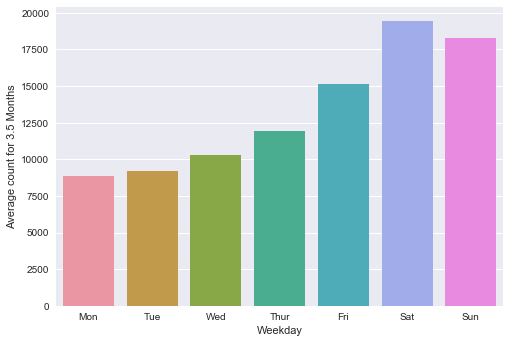

In [58]:
wkday = df_15T.sort_values(by='count', ascending=False)
wkday_counts = wkday[['count', 'weekday']]
wkday_count = wkday_counts.groupby('weekday').sum().reset_index()

wkday_count['weekday'] = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
wkday_count = wkday_count[['weekday', 'count']]
sns.barplot(x='weekday', y='count', data=wkday_count)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Weekday')
plt.show()

There are more login times during the weekend

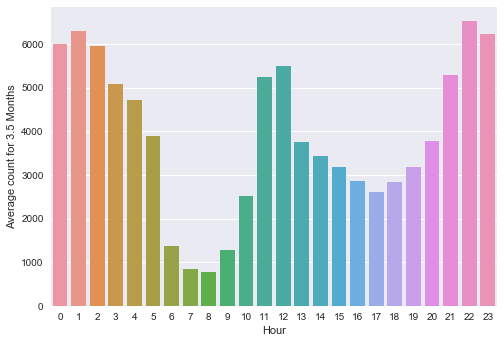

In [61]:
df_15T['hour']= df_15T['login_time'].dt.hour
hour = df_15T.sort_values(by='count', ascending=False)
hour_count = hour[['count', 'weekday']]
hour_count = hour.groupby('hour').sum().reset_index()

#wkday_count['weekday'] = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
#wkday_count = wkday_count[['weekday', 'count']]
sns.barplot(x='hour', y='count', data=hour_count)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Hour')
plt.show()

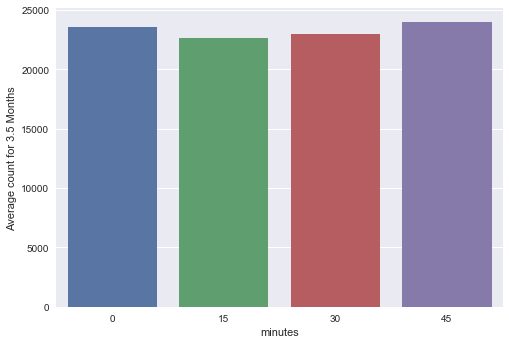

In [67]:
df_15T['mins']= df_15T['login_time'].dt.minute

mins_count = df_15T[['count', 'mins']]
mins_count = mins_count.groupby('mins').sum().reset_index()

#wkday_count['weekday'] = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
#wkday_count = wkday_count[['weekday', 'count']]
sns.barplot(x='mins', y='count', data=mins_count)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('minutes')
plt.show()

Conclusion:
Most login times are during afternoon and night and on weekends.

Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

The main aim of the study is to increase he profits by increasing the driver/rider acceptance and sign-ups and reducing the wait times.
For this experiment the effectiveness could be measured using A/B test. We could split the driver's data randomly into two half and reimnurse toll cost for one group and compre the results.

The statistical test could be used after getting the results and perfom t-test for significance (p = 0.05) between each group.

if the profits decrease after the experiment that means reimbursing all toll costs was not effectively to incrrease driver/rider sigup and acceptance rate.

Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

Data cleaning - 

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df_data.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Since there are null vallues we replace null values my mean values

In [11]:
df_data['avg_rating_by_driver'].fillna(df_data['avg_rating_by_driver'].mean(), inplace=True)
df_data['avg_rating_of_driver'].fillna(df_data['avg_rating_of_driver'].mean(), inplace=True)
df_data['phone'].fillna('iPhone', inplace=True)

In [13]:
df_data.head(5)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


Data  Visualization

In [24]:
#Popular city that has more trips

trips_city = (df_data[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())
trips_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


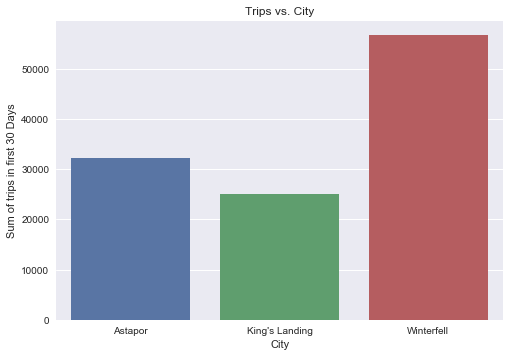

In [17]:
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. City')
plt.show()

Winterfell is th most popular city having more users.

In [25]:
trips_ph = (df_data[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index())
trips_ph

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


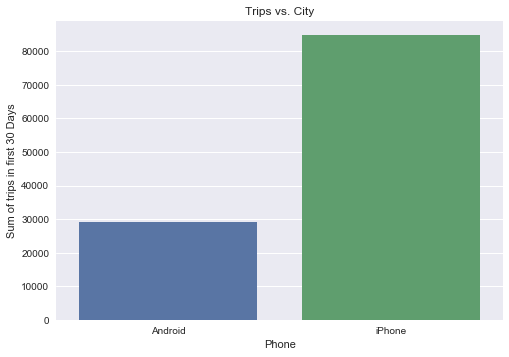

In [28]:
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_ph)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('Phone')
plt.title('Trips vs. City')
plt.show()

In [ ]:
print('first and last trip of the users', df_data['last_trip_date'].min(),df_data['last_trip_date'].max())
df_data['retained'] = np.nan

In [47]:
#active users in their 6th month on the system

df_data.loc[df_data['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df_data.loc[df_data['last_trip_date'] < '2014-06-01', 'retained'] = 0
df_data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,customers retained,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0,0.0


In [48]:
frac = df_data['retained'].sum()/len(df_data)

In [49]:
print('The fraction of users retained',frac) 

The fraction of users retained 0.37608


Data Preprocessing 

To convert categorial variables 

In [ ]:
df_data.drop('last_trip_date',axis =1,inplace =True)
df_data.drop('signup_date',axis=1,inplace=True)

In [56]:
df_data.drop('customers retained',axis=1,inplace=True)

In [57]:
df1 = pd.get_dummies(df_data, columns = ['city', 'phone', 'ultimate_black_user'])
df1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1.0,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0.0,0,0,1,1,0,1,0


In [66]:
X = df1.drop('retained',axis=1)
y=df1['retained']

Predictive Modeling

In [67]:
from  sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [69]:

# Normalize data# Normali 
scaler = StandardScaler()
scaler.fit(X_train) # use train data to fit
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)
print(classification_report(y_true=y_test, y_pred=model1.predict(X_test), target_names=['no', 'yes']))

             precision    recall  f1-score   support

         no       0.78      0.72      0.75      6137
        yes       0.60      0.67      0.63      3863

avg / total       0.71      0.70      0.70     10000



In [75]:
features = pd.DataFrame(X.columns)
coefficients = pd.DataFrame(abs(model1.coef_)).unstack().unstack()
results = pd.concat([features, coefficients], axis=1)
results.columns = ['features', 'coefficients']
results.sort_values(by='coefficients')

,features,coefficients
6,weekday_pct,0.018377
2,avg_rating_of_driver,0.038836
3,avg_surge,0.043822
9,city_Winterfell,0.066543
4,surge_pct,0.067503
1,avg_rating_by_driver,0.078595
0,avg_dist,0.203084
12,ultimate_black_user_False,0.206222
13,ultimate_black_user_True,0.206222
10,phone_Android,0.248447


Based on logistic regression the four  most important features are whether the user is in King's Landing, whether the user is in Astaphor and how many trips did the user have in first 30 days and if the user have iphone.